In [ ]:
# Cell 1 - Import required libraries and set plotting configurations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context('notebook', font_scale=1.2)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

PROJECT_ROOT = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()

: 

In [2]:
# Cell 2 - Load cleaned dataset
data_path = PROJECT_ROOT / 'data' / 'processed' / 'cleaned_superstore_data.csv'
try:
    df = pd.read_csv(data_path)
    print('Cleaned dataset loaded successfully.')
except FileNotFoundError:
    print(f'Error: {data_path} not found. Ensure the cleaned dataset is in data/processed/.')
    raise

print('\nDataset Info:')
df.info()

Cleaned dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Row ID                    9994 non-null   int64  
 1   Order ID                  9994 non-null   object 
 2   Customer ID               9994 non-null   object 
 3   Customer Name             9994 non-null   object 
 4   City                      9994 non-null   object 
 5   State                     9994 non-null   object 
 6   Postal Code               9994 non-null   int64  
 7   Product ID                9994 non-null   object 
 8   Product Name              9994 non-null   object 
 9   Sales                     9994 non-null   float64
 10  Quantity                  9994 non-null   int64  
 11  Discount                  9994 non-null   float64
 12  Profit                    9994 non-null   float64
 13  Ship Mode_S

In [3]:
# Cell 3 - Calculate overall sales and profit metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_discount = df['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

print('\nOverall Business Metrics:')
print(f'Total Sales: ${total_sales:,.2f}')
print(f'Total Profit: ${total_profit:,.2f}')
print(f'Average Discount: {avg_discount:.2%}')
print(f'Profit Margin: {profit_margin:.2f}%')


Overall Business Metrics:
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Discount: 15.62%
Profit Margin: 12.47%


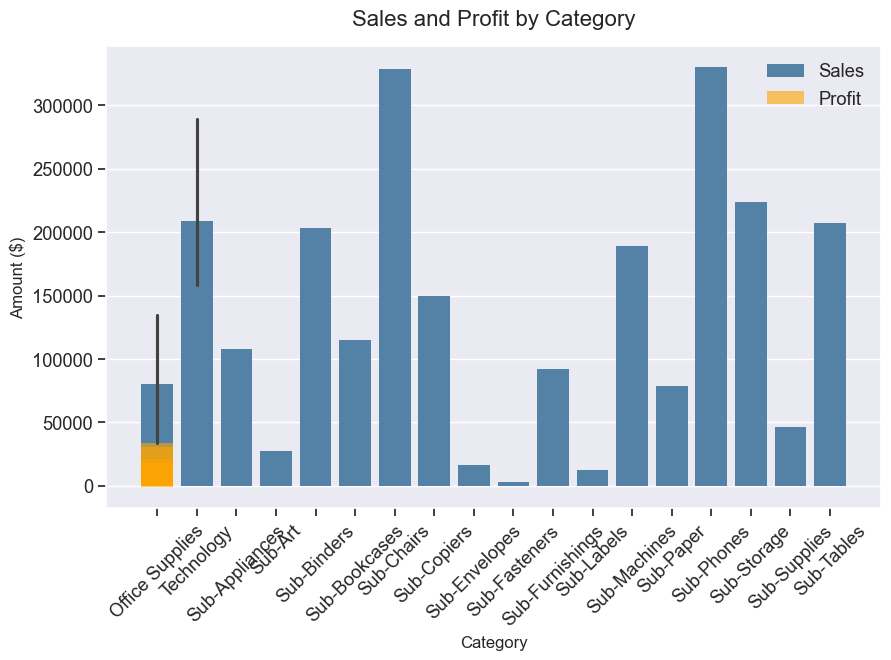

In [4]:
# Cell 4 - Analyze sales and profit by category
category_cols = [col for col in df.columns if 'Category_' in col]
category_sales = df.groupby(category_cols)['Sales'].sum().reset_index()
category_profit = df.groupby(category_cols)['Profit'].sum().reset_index()

category_summary = pd.concat([
    category_sales.melt(id_vars=['Sales'], value_vars=category_cols, var_name='Category', value_name='Present'),
    category_profit['Profit']
], axis=1).query('Present == 1').drop('Present', axis=1)

category_summary['Category'] = category_summary['Category'].str.replace('Category_', '')

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_summary, color='steelblue', label='Sales')
plt.bar(category_summary['Category'], category_summary['Profit'], color='orange', alpha=0.6, label='Profit')
plt.xticks(rotation=45)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Sales and Profit by Category', fontsize=16, pad=15)
plt.legend()
plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'sales_profit_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

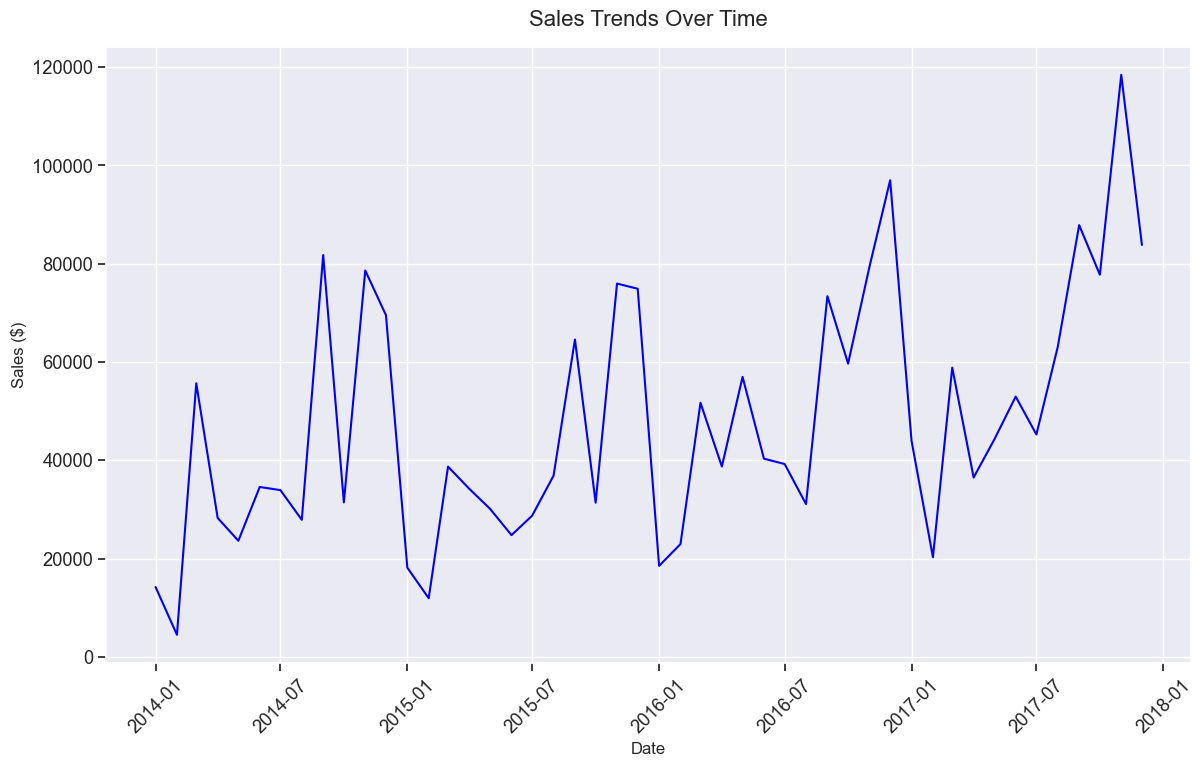

In [5]:
# Cell 5 - Analyze sales trends over time
sales_by_month = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()
sales_by_month['Date'] = pd.to_datetime(sales_by_month['Order Year'].astype(str) + '-' + sales_by_month['Order Month'].astype(str) + '-01')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Sales', data=sales_by_month, color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.title('Sales Trends Over Time', fontsize=16, pad=15)
plt.xticks(rotation=45)
plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'sales_trends_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

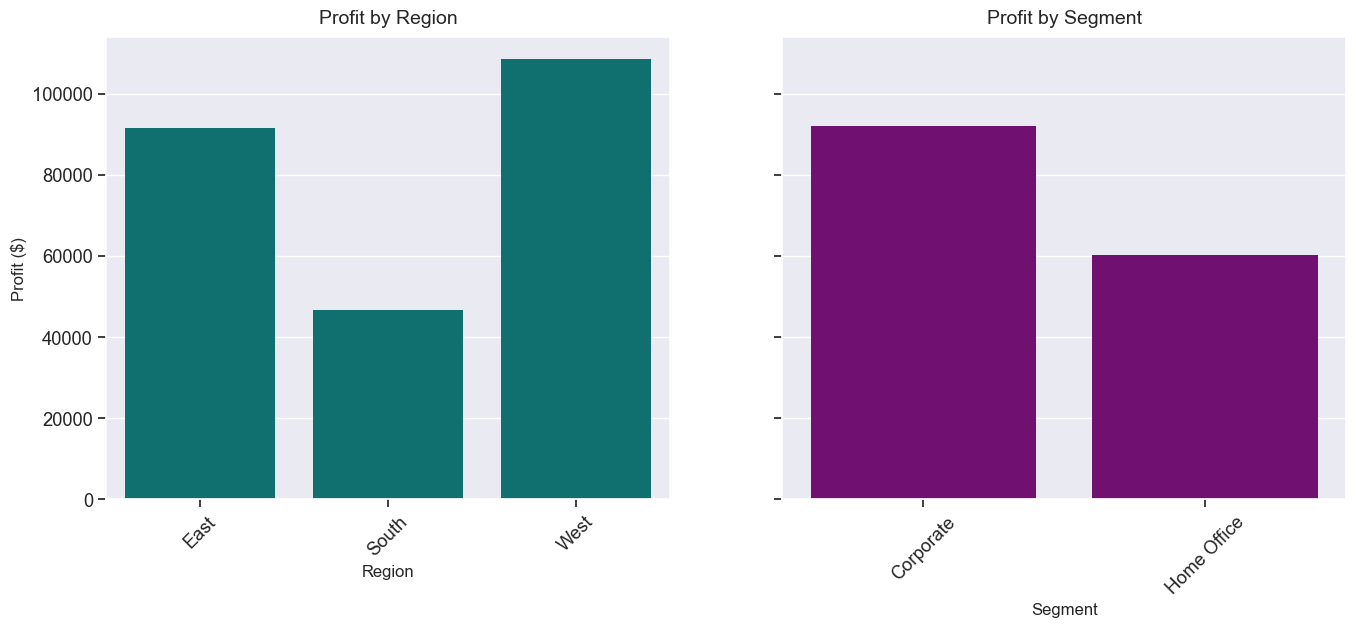

In [6]:
# Cell 6 - Analyze profit by region and segment
region_cols = [col for col in df.columns if 'Region_' in col]
segment_cols = [col for col in df.columns if 'Segment_' in col]

region_profit = df.groupby(region_cols)['Profit'].sum().reset_index()
segment_profit = df.groupby(segment_cols)['Profit'].sum().reset_index()

region_summary = region_profit.melt(id_vars=['Profit'], value_vars=region_cols, var_name='Region', value_name='Present')
region_summary = region_summary[region_summary['Present'] == 1].drop('Present', axis=1)
region_summary['Region'] = region_summary['Region'].str.replace('Region_', '')

segment_summary = segment_profit.melt(id_vars=['Profit'], value_vars=segment_cols, var_name='Segment', value_name='Present')
segment_summary = segment_summary[segment_summary['Present'] == 1].drop('Present', axis=1)
segment_summary['Segment'] = segment_summary['Segment'].str.replace('Segment_', '')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.barplot(x='Region', y='Profit', data=region_summary, ax=ax1, color='teal')
sns.barplot(x='Segment', y='Profit', data=segment_summary, ax=ax2, color='purple')
ax1.set_title('Profit by Region', fontsize=14, pad=10)
ax2.set_title('Profit by Segment', fontsize=14, pad=10)
ax1.set_xlabel('Region', fontsize=12)
ax2.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Profit ($)', fontsize=12)
ax2.set_ylabel('')
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'profit_by_region_segment.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/rd/v7chfg_s48s67l7bpbm9w9180000gn/T/ipykernel_27685/6137128.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby(discount_bins)['Profit'].mean().reset_index()


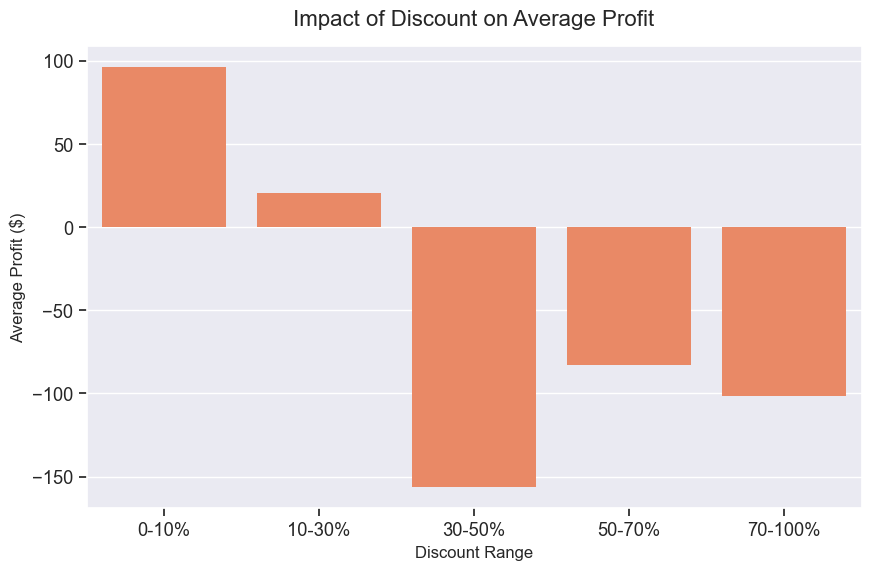

In [7]:
# Cell 7 - Analyze discount impact on profit
discount_bins = pd.cut(df['Discount'], bins=[0, 0.1, 0.3, 0.5, 0.7, 1.0], labels=['0-10%', '10-30%', '30-50%', '50-70%', '70-100%'])
discount_analysis = df.groupby(discount_bins)['Profit'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Profit', data=discount_analysis, color='coral')
plt.xlabel('Discount Range', fontsize=12)
plt.ylabel('Average Profit ($)', fontsize=12)
plt.title('Impact of Discount on Average Profit', fontsize=16, pad=15)
plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'discount_impact_on_profit.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Cell 8 - Print key business insights
print('\nKey Business Insights:')
print(f'- Top Category by Sales: {category_summary.loc[category_summary["Sales"].idxmax(), "Category"]} '
      f'(${category_summary["Sales"].max():,.2f})')
print(f'- Most Profitable Category: {category_summary.loc[category_summary["Profit"].idxmax(), "Category"]} '
      f'(${category_summary["Profit"].max():,.2f})')
print(f'- Most Profitable Region: {region_summary.loc[region_summary["Profit"].idxmax(), "Region"]} '
      f'(${region_summary["Profit"].max():,.2f})')
print(f'- Most Profitable Segment: {segment_summary.loc[segment_summary["Profit"].idxmax(), "Segment"]} '
      f'(${segment_summary["Profit"].max():,.2f})')
print('- Discount Impact: Higher discounts (above 50%) generally reduce average profit, suggesting a need for strategic discount management.')


Key Business Insights:
- Top Category by Sales: Technology ($330,007.05)
- Most Profitable Category: Office Supplies ($34,053.57)
- Most Profitable Region: West ($108,418.45)
- Most Profitable Segment: Corporate ($91,979.13)
- Discount Impact: Higher discounts (above 50%) generally reduce average profit, suggesting a need for strategic discount management.
